In [101]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def distribution_numerics_sns(data, i):
    
    if i not in ['Építés éve', 'Szoba', 'Épület szintjei', 'Iskola közelben', 'CSOK', 'Csendes övezet', 'Balaton közelében', 'Megyeszékhely']:
        
        plt.figure(figsize = (9, 4))
        sns.distplot(data[i], kde = False, bins = 40, 
                     hist_kws = {'edgecolor' : 'black', 'linewidth' : 1})

        plt.title('Distribution of ' + i)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.show()  
        
    else:
        
        plt.figure(figsize = (9, 4))
        sns.countplot(data[i], color = '#89bedc', edgecolor = 'black', linewidth = 1/2)

        plt.title('Distribution of ' + i)
        plt.xlabel(None)
        plt.xticks(rotation=90)
        plt.ylabel(None)
        plt.show()
        
        
BOXPLOT_PROPS = {
    'boxprops':{'edgecolor':'black', 'linewidth' : 1},
    'flierprops':{'markerfacecolor':'black', 'markeredgecolor':'darkgray', 'marker' : 'x'},
    'medianprops':{'color':'black', 'linewidth' : 1},
    'whiskerprops':{'color':'black', 'linewidth' : 1},
    'capprops':{'color':'black', 'linewidth' : 1}
}

def boxplot_sns_price(data, y):  
    
    df = data.loc[:,['Ár', y]].copy()
    if str(df[y].dtype) == 'Int64':
        df[y] = df[y].astype('float').fillna('NA').astype(str)
        
    else:
        df[y] = df[y].fillna('NA').astype(str)

    order = df.groupby([y]).median().sort_values('Ár', ascending = False)

    plt.figure(figsize = (10, 5))
    sns.boxplot(data = df, y = y, x = 'Ár', color = 'blue', fliersize = 2, 
                **BOXPLOT_PROPS, order = order.index)
    plt.xlabel('Ár')
    plt.ylabel(None)
    plt.title('Distribution of asking price with regards to ' + y)
    plt.show()
    
def plot_corr(df, numerics):
    
    fig, ax = plt.subplots(figsize = (14, 6))
    sns.heatmap(df[numerics].corr(), ax = ax, cmap = 'coolwarm', center = 0, 
                annot = True, fmt = '.2g', annot_kws={'size' : 10})
    plt.title('Correlations\n')
    plt.show()
    
def scatter_sns(data, x, y):
    plt.figure(figsize = (9, 5))
    sns.scatterplot(data = data, x = x, y = y, size = 3/4, edgecolor = 'k', linewidth = 1/3, color = 'blue', legend = False)
    plt.title('Relationship between ' + x + ' and ' + y)
    plt.show() 

In [102]:
data = pd.read_csv('data/haz_hirdetesek_cleaned.csv.gz', compression='gzip')

In [103]:
data['Épület szintjei'] = data['Épület szintjei'].astype('Int64')
data['Építés éve'] = data['Építés éve'].astype('Int64')

data['Alapterület'] = data['Alapterület'].astype('int')
data['Telekterület'] = data['Telekterület'].astype('int')
data['Szoba'] = data['Szoba'].astype('int')
data['Ár'] = data['Ár'].astype('int')

### Distributions

In [104]:
numerics = data.select_dtypes(exclude = 'O').columns.tolist()

In [105]:
data[numerics].describe(percentiles = [.01, .1, .25, .5, .75, .9, .99]).T.astype(int)

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Építés éve,36112,1985,22,1950,1950,1965,1965,1990,2005,2020,2022,2025
Épület szintjei,37533,1,0,1,1,1,1,2,2,3,4,7
Pince,25886,0,0,0,0,0,0,1,1,1,1,1
Alapterület,56926,169,974,1,35,65,90,120,180,280,742,143889
Telekterület,56926,1884,67962,1,50,284,459,733,1191,2139,11784,16000000
Szoba,56926,4,2,0,1,2,3,4,5,6,12,255
Ár,56926,75465970,115485045,-2147483648,3500000,12500000,25500000,52000000,85000000,149000000,491500000,2124000000
Iskola közelben,56926,0,0,0,0,0,0,0,0,1,1,1
CSOK,56926,0,0,0,0,0,0,0,0,1,1,1
Csendes övezet,56926,0,0,0,0,0,0,0,1,1,1,1


In [106]:
data = data[data['Ár'].between(0, 500000000)]
data = data[data['Telekterület'] <= 15000]
data = data[data['Szoba'] <= 15]
data = data[data['Alapterület'] <= 5000]

In [107]:
data[numerics].describe(percentiles = [.01, .1, .25, .5, .75, .9, .99]).T.astype(int)

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Építés éve,35288,1985,22,1950,1950,1965,1965,1990,2005,2020,2022,2023
Épület szintjei,36856,1,0,1,1,1,1,2,2,3,4,7
Pince,25435,0,0,0,0,0,0,0,1,1,1,1
Alapterület,55767,150,119,1,35,65,89,120,179,266,557,4200
Telekterület,55767,1058,1270,1,50,280,452,722,1150,2000,6804,15000
Szoba,55767,3,1,0,1,2,3,4,5,6,10,15
Ár,55767,67613442,65758174,190000,3600000,12500000,25000000,51000000,84900000,139000000,350000000,500000000
Iskola közelben,55767,0,0,0,0,0,0,0,0,1,1,1
CSOK,55767,0,0,0,0,0,0,0,0,1,1,1
Csendes övezet,55767,0,0,0,0,0,0,0,1,1,1,1


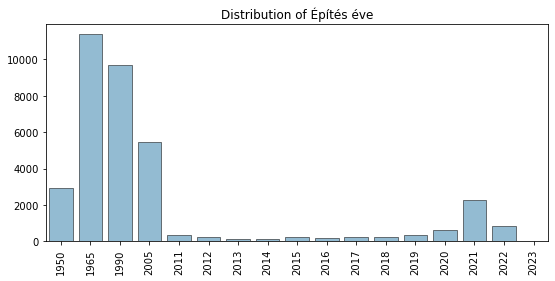

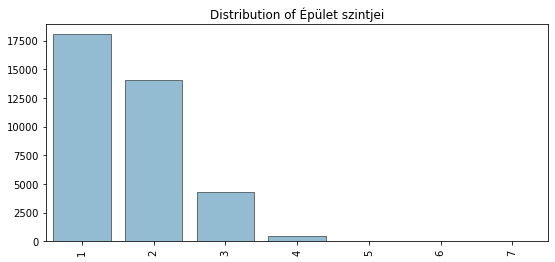

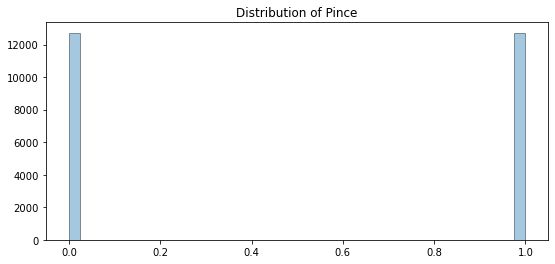

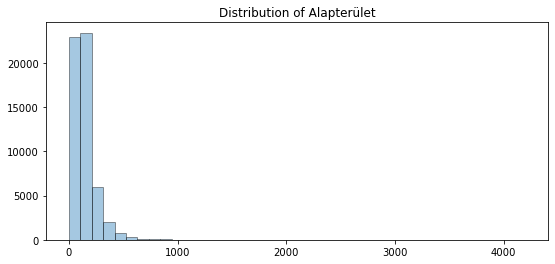

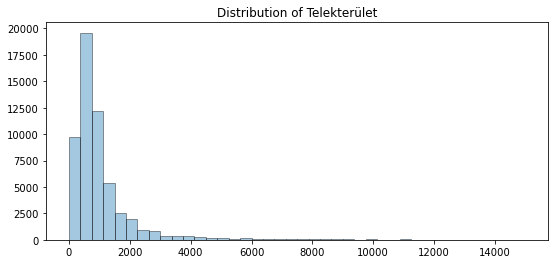

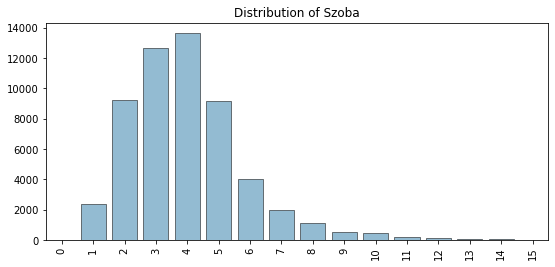

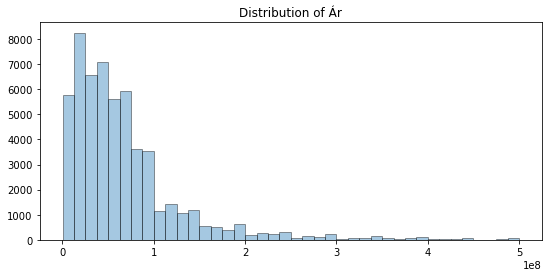

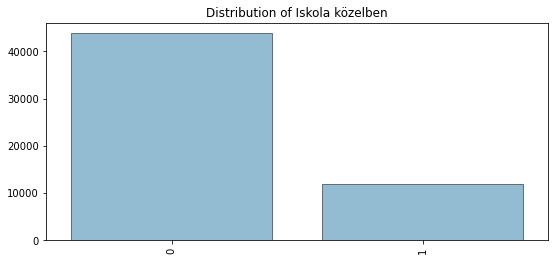

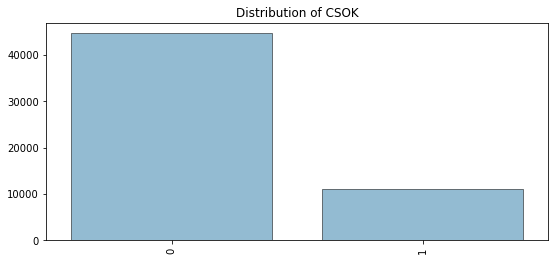

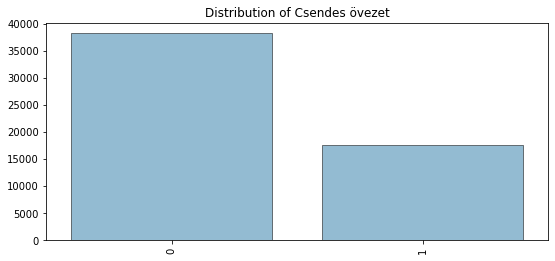

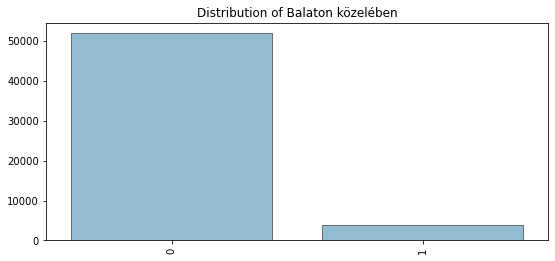

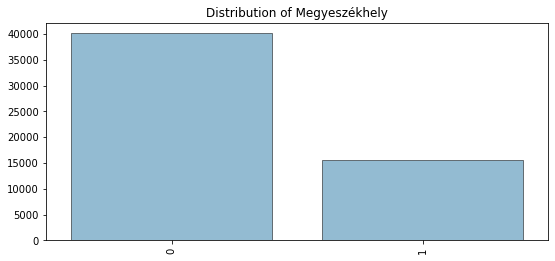

In [108]:
for i in numerics:
    distribution_numerics_sns(data[data[i].notnull()], i)

In [109]:
categoricals = ['Ingatlan állapota','Komfort','Épület szintjei','Fűtés','Fürdő és WC','Kilátás','Tetőtér','Pince',
                'Parkolás','Szoba','Típus','Kerület','Megye','Iskola közelben','CSOK','Csendes övezet',
                'Balaton közelében', 'Megyeszékhely', 'Építés éve']

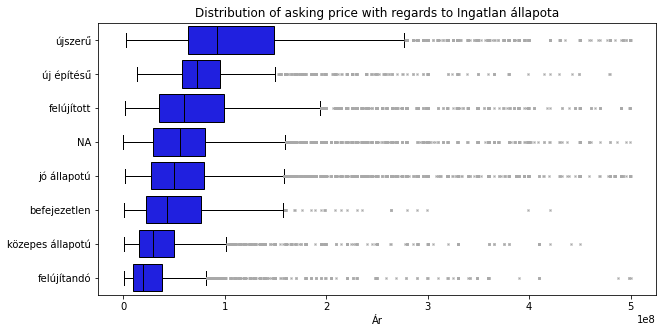

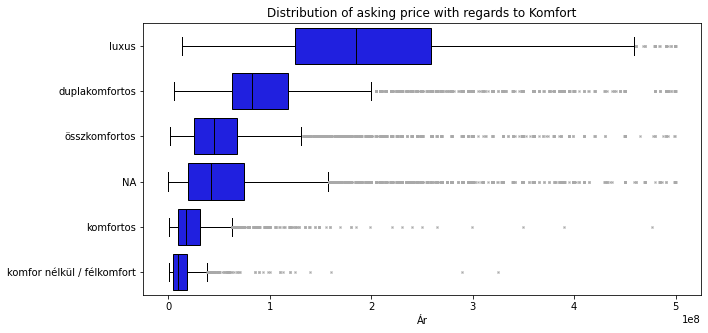

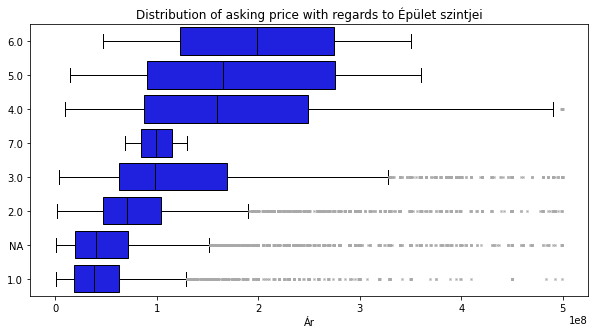

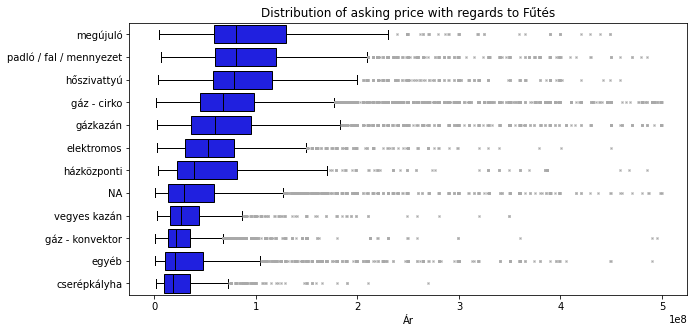

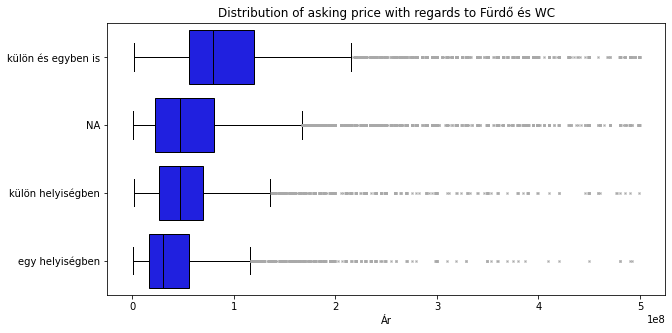

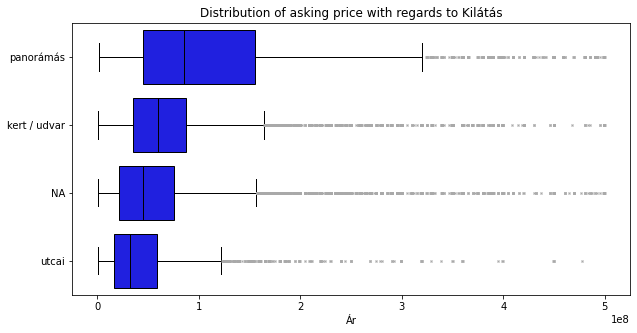

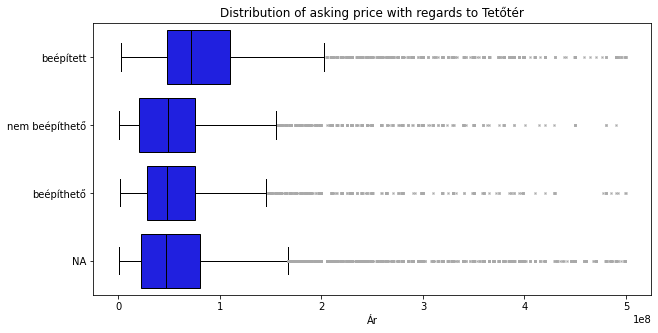

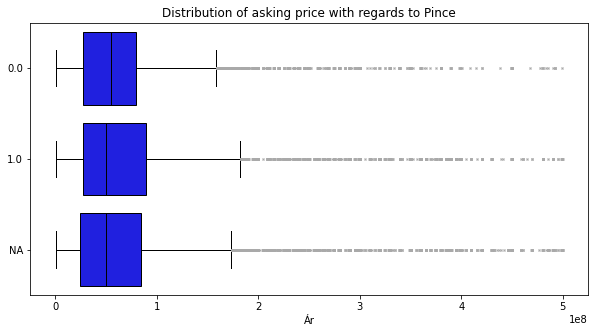

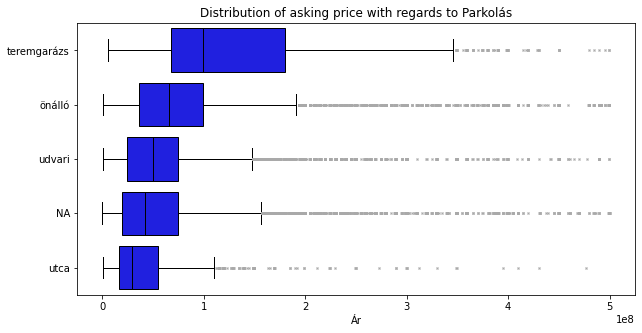

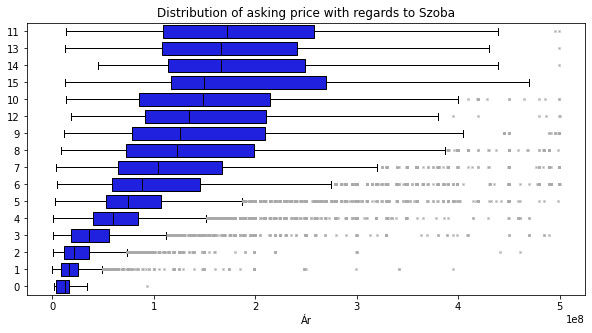

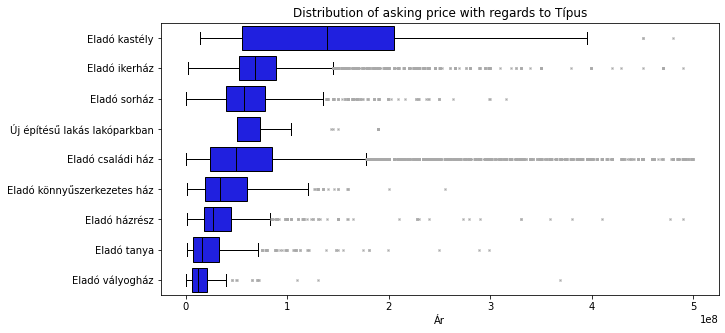

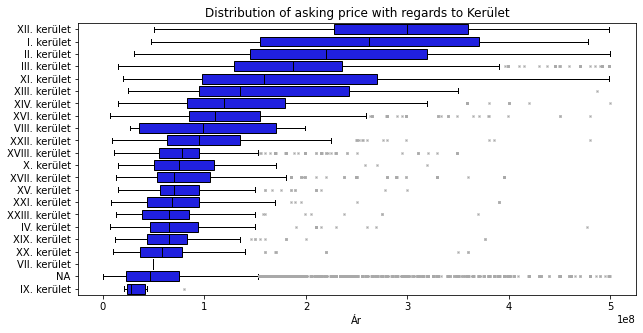

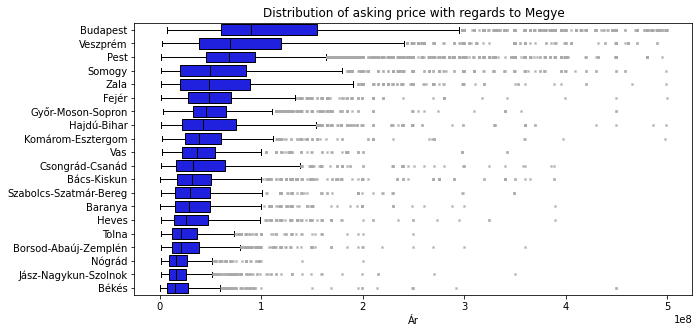

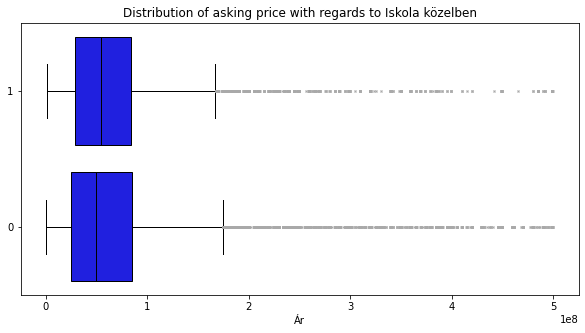

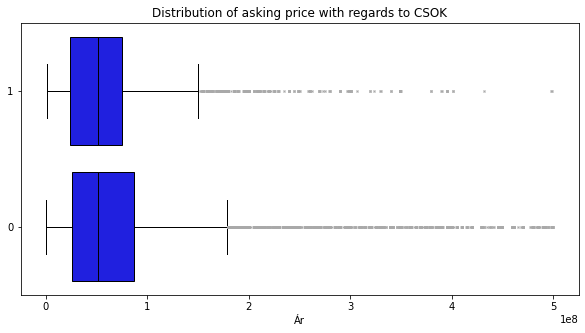

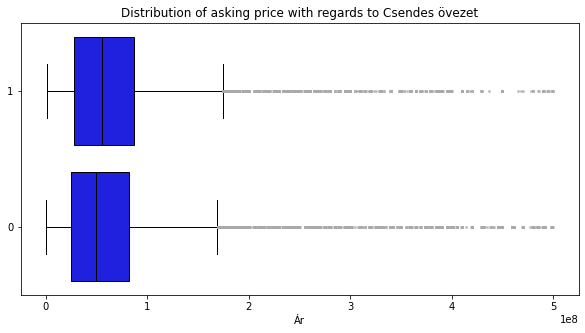

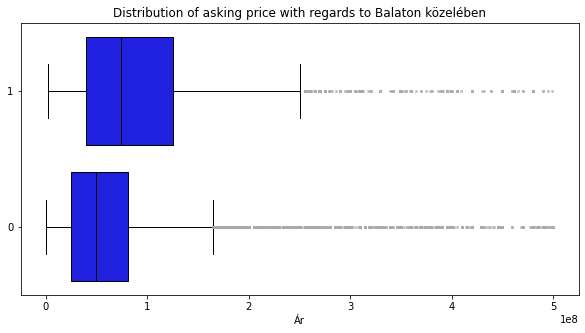

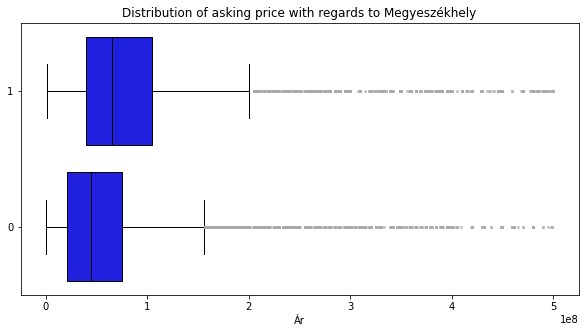

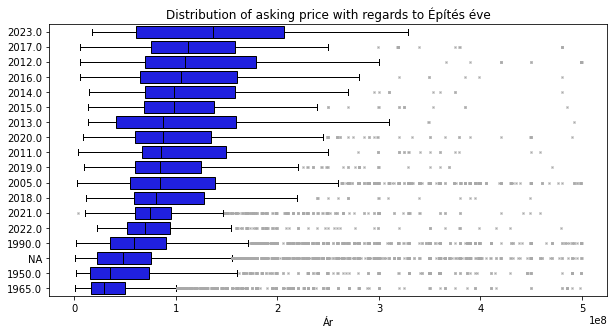

In [110]:
for i in categoricals:
    boxplot_sns_price(data, i)

### Correlation

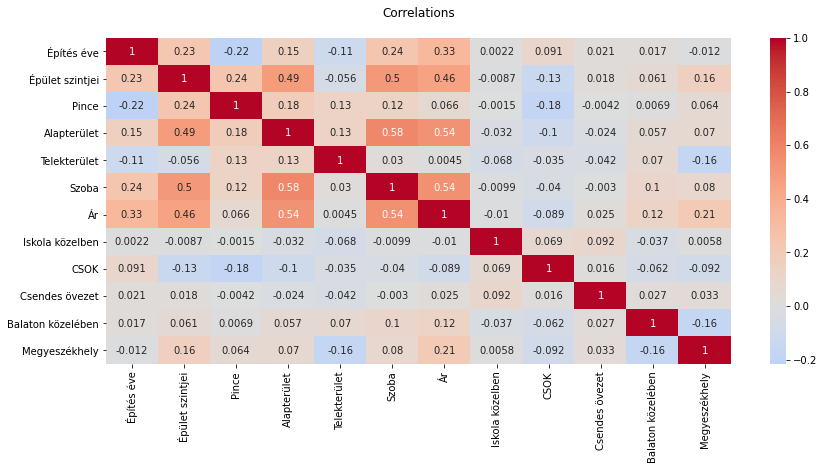

In [111]:
plot_corr(data, numerics)

### Relationships 

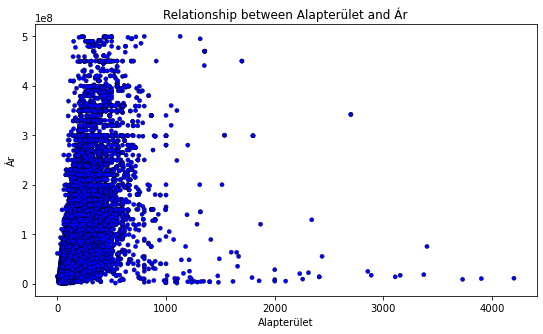

In [112]:
scatter_sns(data, 'Alapterület', 'Ár')

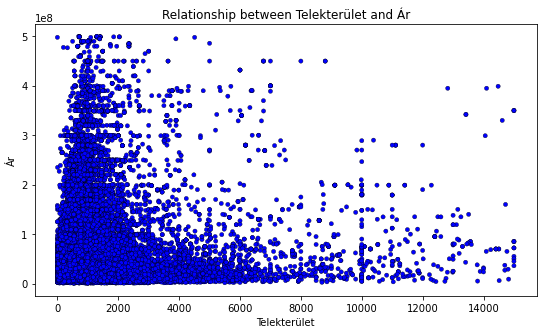

In [113]:
scatter_sns(data, 'Telekterület', 'Ár')

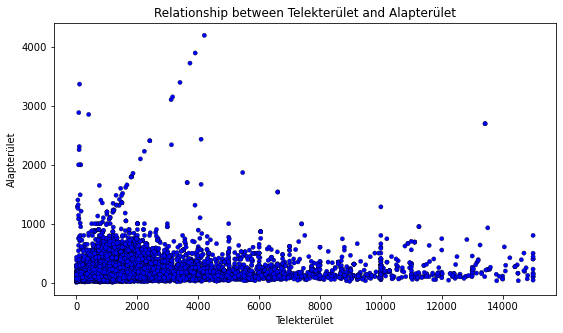

In [114]:
scatter_sns(data, 'Telekterület', 'Alapterület')

#### Save for modeling

In [115]:
data.shape

(55767, 27)

In [116]:
data.drop(['CSOK', 'Iskola közelben', 'Pince', 'Leírás', 'Város', 'Cím', 'Leírás tisztított'], 1, inplace = True)

In [117]:
data.shape

(55767, 20)

In [118]:
data.to_csv('data/haz_hirdetesek_modeling.csv.gz', index = False, compression='gzip')